In [ ]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos pandas con el nombre "pd" por buena practica.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/BBDD/Dataset_core.csv"
df = pd.read_csv(path)

1.-Continuar desde la Parte IV
Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.


In [ ]:
df.info()# revisamos la tabla para tener mas contexto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.info() #Revisamos la tabla para ver los cambios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df#Revisar el df

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# 2.- Exploración de Datos Avanzada

1.   Realiza un análisis de correlación
2.   Crea un mapa de calor para visualizar las relaciones entre las variables.

Calculando la matriz de correlación
Matriz de Correlación:
                     age  quantity  price_per_unit  total_amount
age             1.000000 -0.023737       -0.038423     -0.060568
quantity       -0.023737  1.000000        0.017501      0.373707
price_per_unit -0.038423  0.017501        1.000000      0.851925
total_amount   -0.060568  0.373707        0.851925      1.000000




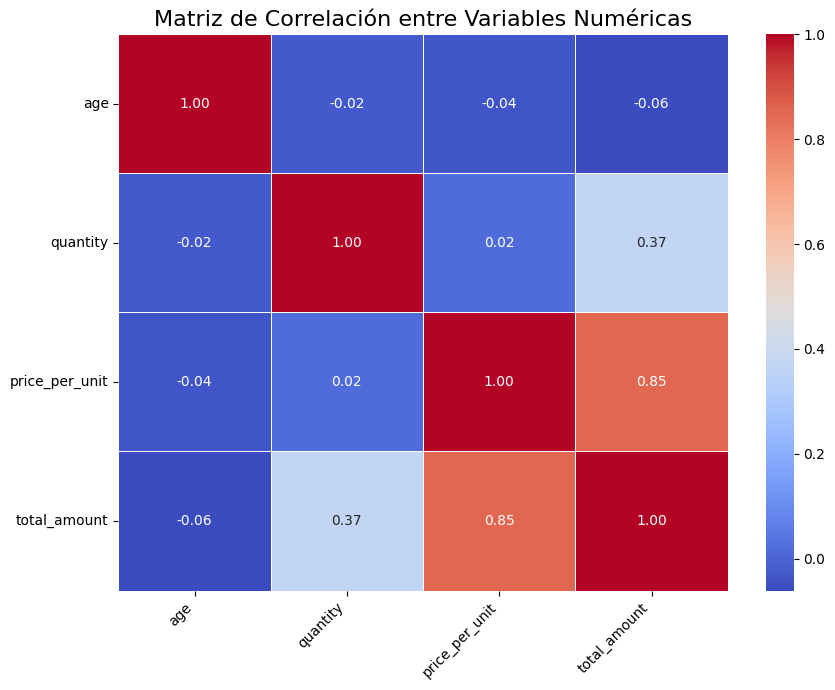

In [ ]:
#Seleccionar las columnas numericas para el analisis de correlacion
# no inclui la columna transaction_id ya que es un (ID)identificador y date por ser una fecha

colum_numericas = ['age', 'quantity', 'price_per_unit', 'total_amount']

# Calcular la matriz de correlación de Pearson
print("Calculando la matriz de correlación")
correlacion_matrix = df[colum_numericas].corr()
print("Matriz de Correlación:")
print(correlacion_matrix)
print("\n")

# Matriz de correlación con un mapa de calor
plt.figure(figsize=(9, 7)) # Ajusta el tamaño de la figura
sns.heatmap(
    correlation_matrix,
    annot=True,      # Muestra los valores de correlación en el mapa
    cmap='coolwarm', # Elige un mapa de colores
    fmt=".2f",       # Formatea los números a dos decimales
    linewidths=.5    # Añade líneas entre las celdas
)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)# Asegura que las etiquetas del eje y estén horizontales
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

#####Se deja analisis y conclusion al final(Paso 1 y 2)#########


# Analisis paso 1 y 2

**Mi Análisis de Correlación: Descubriendo Relaciones en los Datos de Transacciones**

He estado explorando mi conjunto de datos de transacciones de clientes y he realizado un análisis de correlación para entender cómo se relacionan entre sí algunas de mis variables numéricas clave.

Mis Expectativas y lo que Busco:

Mi objetivo principal era ver la fuerza y dirección de estas relaciones. Sé que un valor de correlación cercano a 1 o −1 indica una relación muy fuerte (positiva o negativa, respectivamente), mientras que un valor cercano a 0 significa que apenas hay una conexión lineal.

Aquí mis principales hallazgos y lo que esperaría encontrar:

quantity (cantidad comprada) y total_amount (monto total):
Para mí, esta es una de las relaciones más obvias. Espero una correlación muy fuerte y positiva. Es lógico, porque si un cliente compra más artículos (mayor quantity), el monto total de su compra (total_amount) debería aumentar directamente, asumiendo un precio por unidad constante. Si mi análisis mostrara algo diferente a un valor cercano a 1, algo estaría mal en mis datos o en cómo se calcula el monto total.
price_per_unit (precio por unidad) y total_amount (monto total):

De manera similar, también preveo una correlación positiva fuerte aquí. Un producto con un precio más alto por unidad debería contribuir a un monto total de transacción mayor, siempre y cuando la cantidad comprada no se desplome drásticamente.
age (edad del cliente) con otras variables de compra (quantity, price_per_unit, total_amount):

Este es el caso donde mis expectativas son más cautelosas. Creo que la correlación de la age con la quantity, el price_per_unit o el total_amount será, como mucho, débil o moderada. No espero ver una relación lineal muy marcada. Las decisiones de compra y el gasto total suelen ser influenciadas por muchísimos factores además de la edad (como ingresos, estilo de vida, etc.), lo que hace que una correlación directa y fuerte solo con la edad sea poco probable en un conjunto de datos general como el mío. Un valor cercano a 0 aquí no me sorprendería.
En Conclusión:

Este análisis me ayuda a confirmar las relaciones lógicas en mis datos y a identificar dónde puedo profundizar. Las correlaciones entre cantidad/precio y el monto total me servirán para validar la calidad de mis datos. En cuanto a la edad, si encuentro correlaciones débiles, sabré que necesito buscar otros factores más complejos para entender el comportamiento de compra de mis clientes.

# 3.- Crea subplots para comparar diferentes variables clave y Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

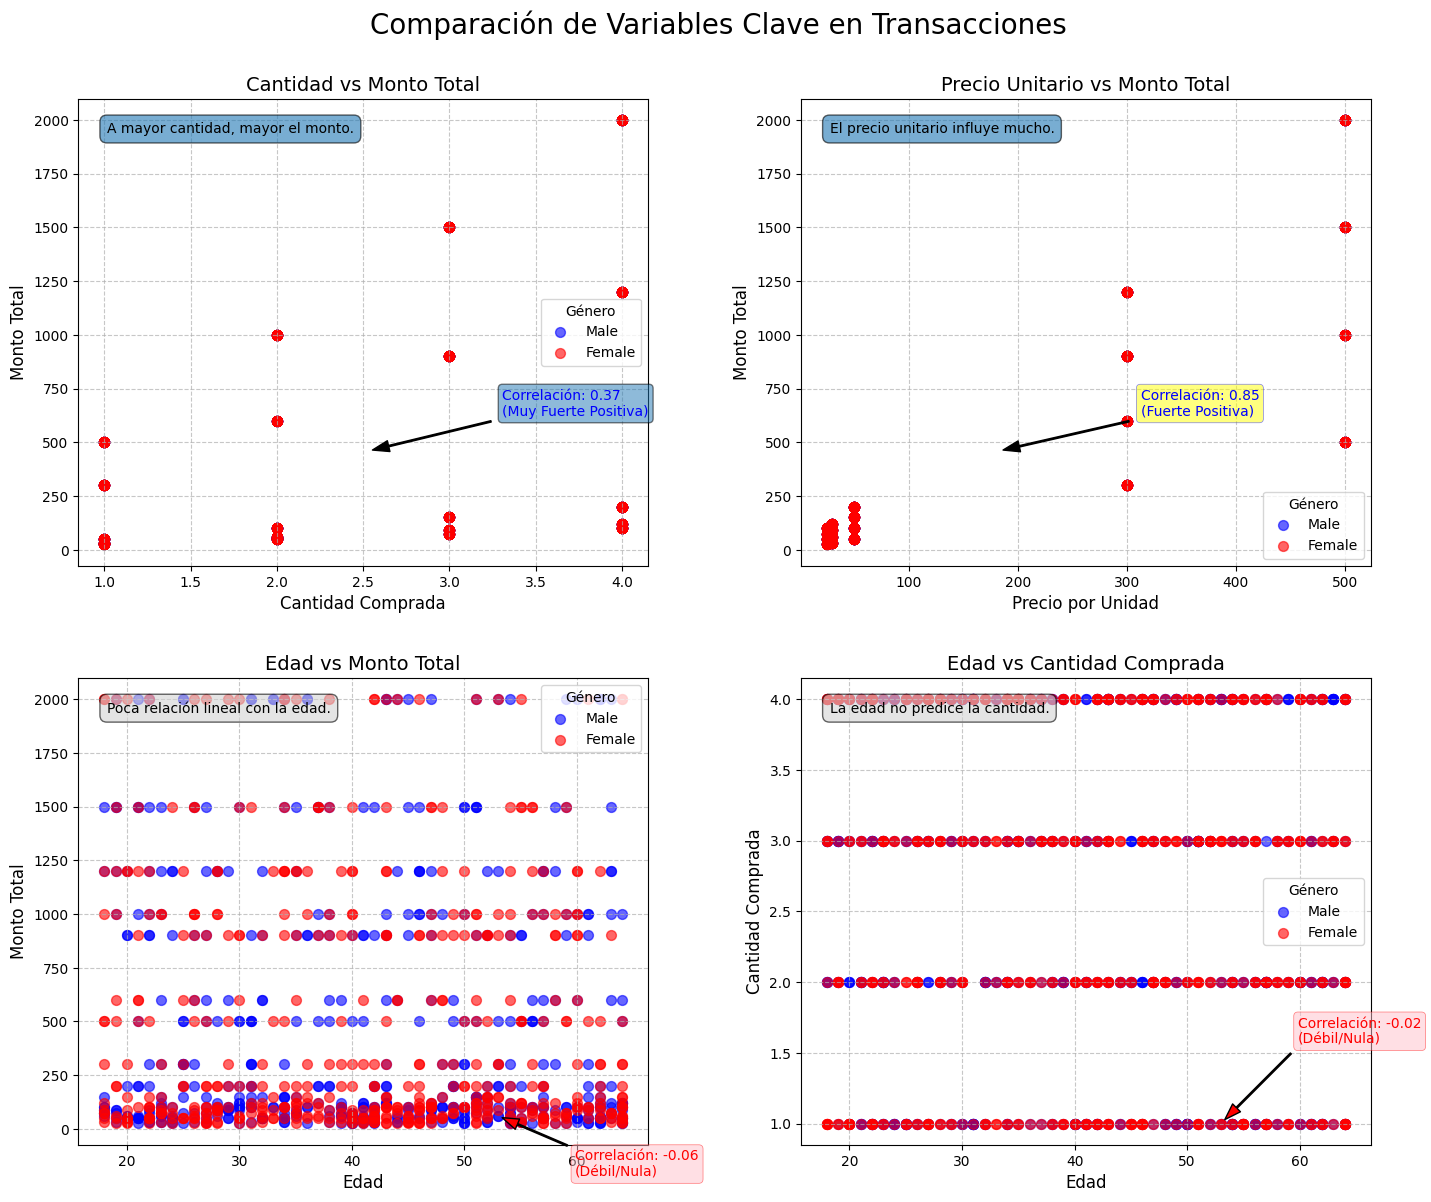

In [ ]:
#Crear la figura principal
figura = plt.figure(figsize=(15, 12)) #figura principal


#Subplot 1: quantity vs total_amount (Posición 2x2, primer subplot)
subplot1 = figura.add_subplot(2, 2, 1) # 2 filas, 2 columnas, primer subplot (índice 1)

# Filtro los datos por género
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

subplot1.scatter(df_male['quantity'], df_male['total_amount'], color='blue', label='Male', alpha=0.6, s=50)
subplot1.scatter(df_female['quantity'], df_female['total_amount'], color='red', label='Female', alpha=0.6, s=50)
subplot1.set_title('Cantidad vs Monto Total', fontsize=14)
subplot1.set_xlabel('Cantidad Comprada', fontsize=12)
subplot1.set_ylabel('Monto Total', fontsize=12)
subplot1.grid(True, linestyle='--', alpha=0.7) # Cuadrícula
subplot1.legend(title='Género') # Leyenda

# Calcular correlación para anotación
corr1 = df['quantity'].corr(df['total_amount'])
subplot1.annotate(f'Correlación: {corr1:.2f}\n(Muy Fuerte Positiva)',
             xy=(df['quantity'].mean(), df['total_amount'].mean()), # Punto al que apunta la flecha
             xytext=(df['quantity'].mean() + df['quantity'].std() * 0.7, df['total_amount'].mean() + df['total_amount'].std() * 0.3), # Posición del texto
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), # Propiedades de la flecha
             fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3",alpha=0.5))
subplot1.text(0.05, 0.95, 'A mayor cantidad, mayor el monto.', transform=subplot1.transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.6))


#Subplot 2: price_per_unit vs total_amount,Posición 2x2, segundo subplot)
subplot2 = figura.add_subplot(2, 2, 2) # 2 filas, 2 columnas, segundo subplot (índice 2)
subplot2.scatter(df_male['price_per_unit'], df_male['total_amount'], color='blue', label='Male', alpha=0.6, s=50)
subplot2.scatter(df_female['price_per_unit'], df_female['total_amount'], color='red', label='Female', alpha=0.6, s=50)
subplot2.set_title('Precio Unitario vs Monto Total', fontsize=14)
subplot2.set_xlabel('Precio por Unidad', fontsize=12)
subplot2.set_ylabel('Monto Total', fontsize=12)
subplot2.grid(True, linestyle='--', alpha=0.7) # Cuadrícula
subplot2.legend(title='Género') # Leyenda

# Anotación y flecha para correlación fuerte
corr2 = df['price_per_unit'].corr(df['total_amount'])
subplot2.annotate(f'Correlación: {corr2:.2f}\n(Fuerte Positiva)',
             xy=(df['price_per_unit'].mean(), df['total_amount'].mean()),
             xytext=(df['price_per_unit'].mean() + df['price_per_unit'].std() * 0.7, df['total_amount'].mean() + df['total_amount'].std() * 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=0.5, alpha=0.5))
subplot2.text(0.05, 0.95, 'El precio unitario influye mucho.', transform=subplot2.transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5',alpha=0.6))


#Subplot 3: age vs total_amount,Posición 2x2, tercer subplot)
subplot3 = figura.add_subplot(2, 2, 3) # 2 filas, 2 columnas, tercer subplot (índice 3)

# Gráfico de dispersión con Matplotlib (coloreando manualmente por género)
subplot3.scatter(df_male['age'], df_male['total_amount'], color='blue', label='Male', alpha=0.6, s=50)
subplot3.scatter(df_female['age'], df_female['total_amount'], color='red', label='Female', alpha=0.6, s=50)

subplot3.set_title('Edad vs Monto Total', fontsize=14)
subplot3.set_xlabel('Edad', fontsize=12)
subplot3.set_ylabel('Monto Total', fontsize=12)
subplot3.grid(True, linestyle='--', alpha=0.7) # Cuadrícula
subplot3.legend(title='Género') # Leyenda

# Anotación y flecha para correlación débil/nula
corr3 = df['age'].corr(df['total_amount'])
subplot3.annotate(f'Correlación: {corr3:.2f}\n(Débil/Nula)',
             xy=(df['age'].quantile(0.75), df['total_amount'].quantile(0.25)),
             xytext=(df['age'].quantile(0.75) + df['age'].std() * 0.5, df['total_amount'].quantile(0.25) - df['total_amount'].std() * 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8),
             fontsize=10, color='red', bbox=dict(boxstyle="round,pad=0.3", fc="pink", ec="r", lw=0.5, alpha=0.5))
subplot3.text(0.05, 0.95, 'Poca relación lineal con la edad.', transform=subplot3.transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='lightgray', ec='k', lw=1, alpha=0.6))


#Subplot 4: age vs quantity (Posición 2x2, cuarto subplot)
subplot4 = figura.add_subplot(2, 2, 4) # 2 filas, 2 columnas, cuarto subplot (índice 4)

# Gráfico de dispersión con Matplotlib (coloreando manualmente por género)
subplot4.scatter(df_male['age'], df_male['quantity'], color='blue', label='Male', alpha=0.6, s=50)
subplot4.scatter(df_female['age'], df_female['quantity'], color='red', label='Female', alpha=0.6, s=50)
subplot4.set_title('Edad vs Cantidad Comprada', fontsize=14)
subplot4.set_xlabel('Edad', fontsize=12)
subplot4.set_ylabel('Cantidad Comprada', fontsize=12)
subplot4.grid(True, linestyle='--', alpha=0.7) # Cuadrícula
subplot4.legend(title='Género') # Leyenda

# Anotación y flecha para correlación débil/nula
corr4 = df['age'].corr(df['quantity'])
subplot4.annotate(f'Correlación: {corr4:.2f}\n(Débil/Nula)',
             xy=(df['age'].quantile(0.75), df['quantity'].quantile(0.25)),
             xytext=(df['age'].quantile(0.75) + df['age'].std() * 0.5, df['quantity'].quantile(0.25) + df['quantity'].std() * 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8),
             fontsize=10, color='red', bbox=dict(boxstyle="round,pad=0.3", fc="pink", ec="r", lw=0.5, alpha=0.5))
subplot4.text(0.05, 0.95, 'La edad no predice la cantidad.', transform=subplot4.transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='lightgray', ec='k', lw=1, alpha=0.6))


#Mostrar la figura
plt.tight_layout(pad=3.0) # Ajusta el espaciado entre subplots
plt.suptitle('Comparación de Variables Clave en Transacciones', fontsize=20, y=1.02) # Título general
plt.show()